Задание на обработку видео:
Напишите программу на Python, которая загружает видеофайл с диска, извлекает каждый кадр, применяет к нему алгоритм распознавания лиц (используйте любую модель) и выводит результат с отрисованными на кадре прямоугольниками вокруг лиц. Используйте библиотеку OpenCV для работы с видео и распознавания лиц.
Используйте свой пример видеофайла
Результат пришлите на почту svmazur@mail.ru
Код и видеофайл

In [1]:
import pandas as pd
import numpy as np
import torch
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
from matplotlib.cbook import file_requires_unicode
from PIL import Image
import urllib.request
from torch.utils.data import DataLoader
import os.path
from os import path
import torchvision
import requests
from io import BytesIO
from torchvision import datasets, models, transforms
from PIL import Image

from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [2]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.8 MB/s eta 0:00:00


In [3]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.0 MB/s eta 0:00:00


In [4]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import cv2
from PIL import Image, ImageDraw
from IPython import display
import mtcnn


In [6]:
path = "/content/sample_data/video.mp4"
cap = cv2.VideoCapture(path)
if cap.isOpened():
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # float `height`

print(width, height)

1920 1080


In [7]:
mtcnn = MTCNN(image_size=(width, height))

In [8]:
frames = []
path = "/content/sample_data/video.mp4"
cap = cv2.VideoCapture(path)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)
i = 0
if cap.isOpened():
    current_frame = 0
    while i < length:
        i += 1
        ret, frame = cap.read()
        if ret == "False":
          break
        if ret:
            name = f'/content/sample_data/{current_frame}.jpg'
            #print(f"Creating file... {name}")
            cv2.imwrite(name, frame)
            frames.append(name)
        current_frame += 1
    cap.release()

cv2.destroyAllWindows()


105


In [9]:
display.Video('/content/sample_data/video.mp4', width=640)


In [10]:
frames
frames_tracked = []
for i, frame in enumerate(frames):

    frame = Image.open(frame)
    boxes, _ = mtcnn.detect(frame)

    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')


Done


In [11]:
img = Image.open("/content/sample_data/1.jpg")
boxes, probs = mtcnn.detect(img)
boxes = boxes.reshape(-1)

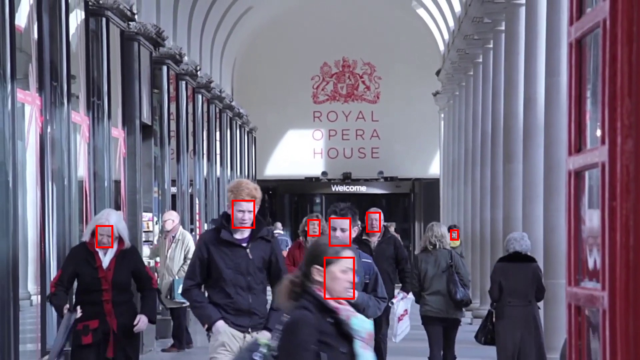

In [13]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
        if i == 20:
          break
except KeyboardInterrupt:
    pass

In [14]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')
video_tracked = cv2.VideoWriter('/content/sample_data/video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()